<a href="https://colab.research.google.com/github/AngelGui/MachineLearning/blob/main/KNeighborsRegressor_and_LinearRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


In [118]:
X = np.linspace(1,5,30)
y = np.sin(X)
y

array([ 0.84147098,  0.90776756,  0.95682125,  0.98770029,  0.99981813,
        0.9929446 ,  0.96721026,  0.92310392,  0.86146339,  0.78345951,
        0.69057395,  0.58457106,  0.46746434,  0.34147822,  0.20900578,
        0.07256331, -0.06525749, -0.20183874, -0.33458609, -0.46097803,
       -0.57861378, -0.68525886, -0.77888757, -0.85772144, -0.92026304,
       -0.9653244 , -0.9920496 , -0.99993098, -0.98881885, -0.95892427])

In [119]:
X

array([1.        , 1.13793103, 1.27586207, 1.4137931 , 1.55172414,
       1.68965517, 1.82758621, 1.96551724, 2.10344828, 2.24137931,
       2.37931034, 2.51724138, 2.65517241, 2.79310345, 2.93103448,
       3.06896552, 3.20689655, 3.34482759, 3.48275862, 3.62068966,
       3.75862069, 3.89655172, 4.03448276, 4.17241379, 4.31034483,
       4.44827586, 4.5862069 , 4.72413793, 4.86206897, 5.        ])

In [120]:
X = X.reshape(-1,1)

In [121]:
import seaborn as sns
sns.set()

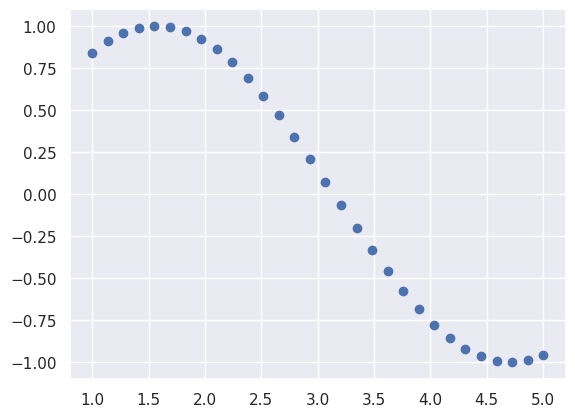

In [122]:
plt.scatter(X,y)

In [123]:
noise = np.random.uniform(-0.25, 0.25, 30)   #np.random.random(30)只接受一个参数，产生的都是0到1之间的数，np.random.normal(mean, std, size), np.random.permutation(df.index), np..random.randint(low, high=None, size=None, dtype=int)
noise

array([-0.16770024, -0.0505499 ,  0.03119106, -0.05889651, -0.02137988,
       -0.21047784,  0.13688211,  0.11594568, -0.10106987,  0.02629169,
        0.23560685, -0.21081484,  0.16914754, -0.23118982,  0.21757006,
       -0.05445522, -0.17303807, -0.09533658, -0.16282338,  0.15247909,
       -0.20782978,  0.15800709, -0.24096437, -0.06174155, -0.18696541,
        0.04763746, -0.07942757,  0.04565016, -0.17924808, -0.15859344])

(array([5., 6., 1., 6., 1., 2., 2., 2., 3., 2.]),
 array([-0.24096437, -0.19330725, -0.14565013, -0.09799301, -0.05033589,
        -0.00267876,  0.04497836,  0.09263548,  0.1402926 ,  0.18794973,
         0.23560685]),
 <BarContainer object of 10 artists>)

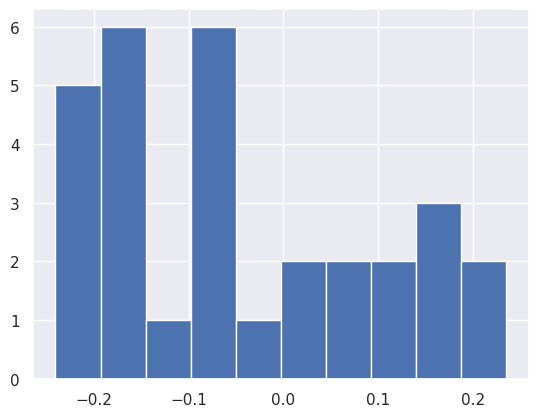

In [124]:
plt.hist(noise)

In [125]:
y_true = y + noise
y_true

array([ 0.67377074,  0.85721767,  0.98801232,  0.92880378,  0.97843825,
        0.78246676,  1.10409237,  1.0390496 ,  0.76039352,  0.8097512 ,
        0.9261808 ,  0.37375621,  0.63661188,  0.11028839,  0.42657583,
        0.01810809, -0.23829556, -0.29717531, -0.49740947, -0.30849894,
       -0.78644356, -0.52725177, -1.01985194, -0.91946299, -1.10722845,
       -0.91768694, -1.07147716, -0.95428083, -1.16806693, -1.11751771])

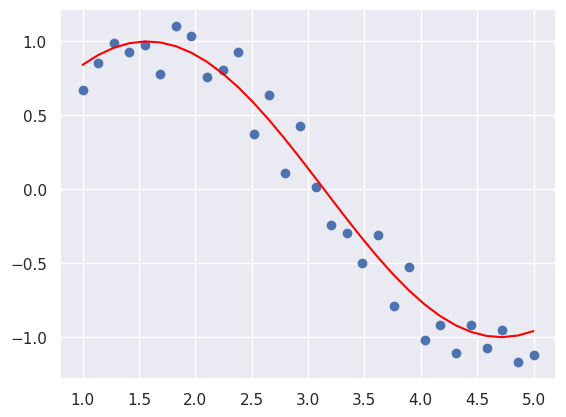

In [126]:
plt.scatter(X, y_true)
plt.plot(X,y,color='red')

In [127]:
knn = KNeighborsRegressor(n_neighbors=5)
ln = LinearRegression()

print(X.shape)
print(y.shape)
results = knn.fit(X, y_true)
ln.fit(X, y_true)

(30, 1)
(30,)


LinearRegression()

In [128]:
results.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [129]:
X_test = np.linspace(0.5,5.5,30).reshape(-1,1)
y_test_knn = knn.predict(X_test)

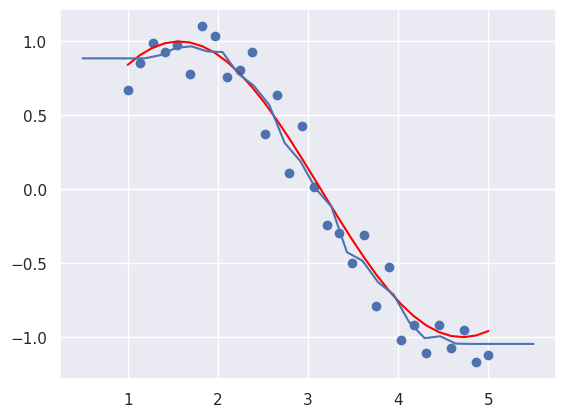

In [130]:
plt.scatter(X, y_true)
plt.plot(X,y,color='red')
plt.plot(X_test, y_test_knn)

In [131]:
colors = sns.color_palette("husl")
colors

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

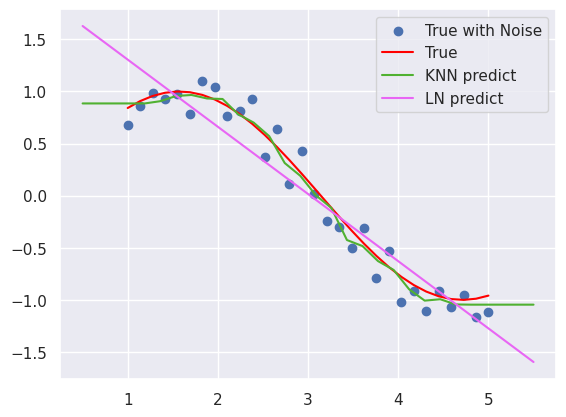

In [132]:
y_test_ln = ln.predict(X_test)
plt.scatter(X, y_true, label="True with Noise")
plt.plot(X,y,color='red', label="True")
plt.plot(X_test, y_test_knn, color=colors[2], label="KNN predict")
plt.plot(X_test, y_test_ln, color=colors[5], label="LN predict")
plt.legend()

In [133]:
ln.coef_

array([-0.64488969])

In [134]:
ln.intercept_

1.9507647213912598

In [135]:
#线性回归一定是条直线，所以可能容易出现欠拟合的情况
#线性回归的求解效率很高
#线性回归的应用场景：特征和目标的相关度分析

In [136]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [137]:
columns = data['feature_names']
x = data['data']
y = data['target']

df = pd.DataFrame(x, columns=columns)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


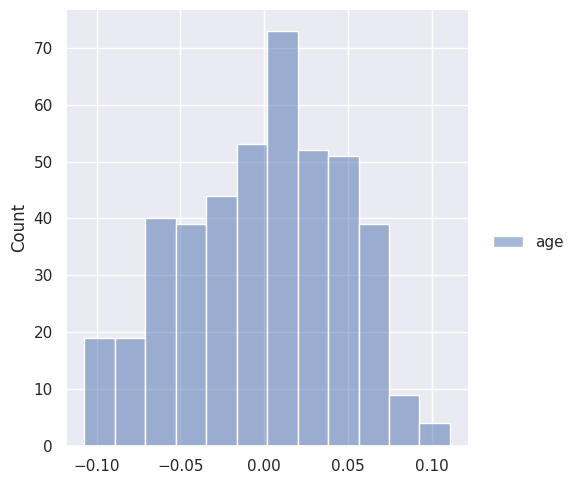

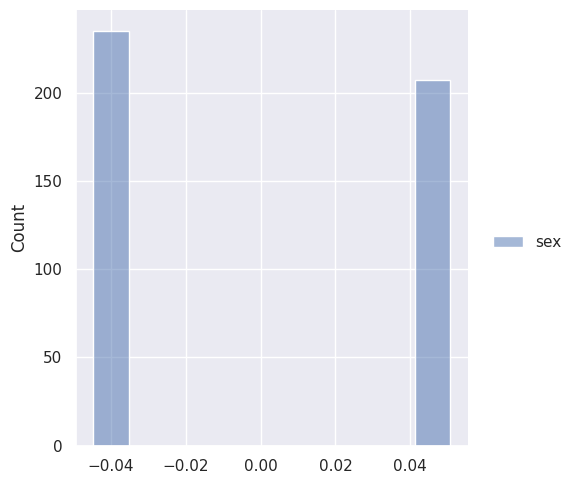

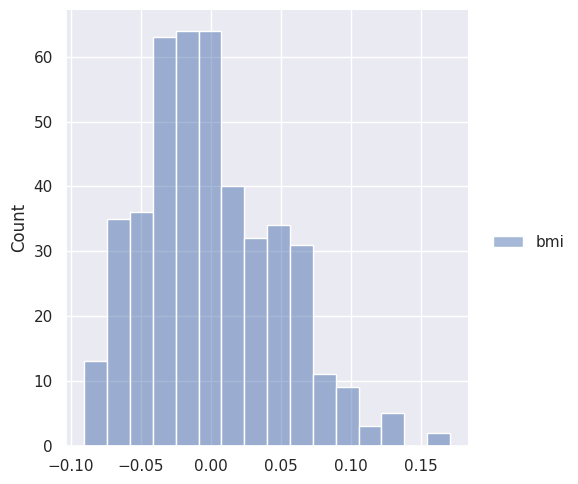

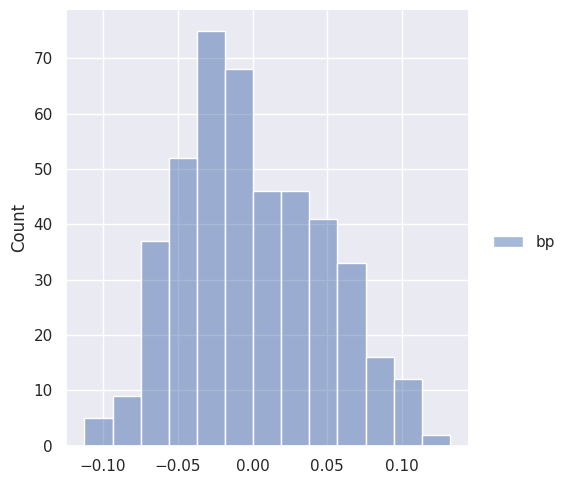

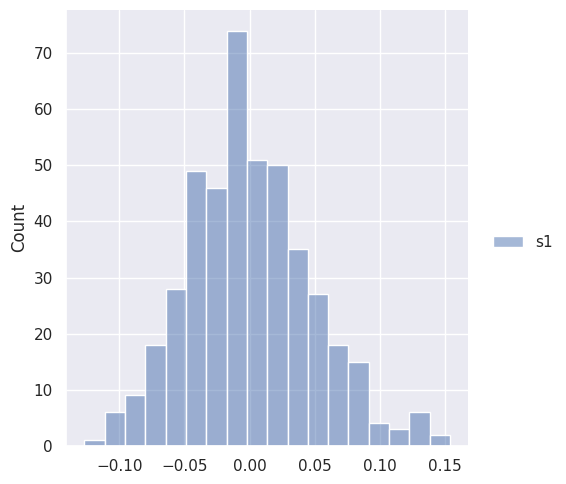

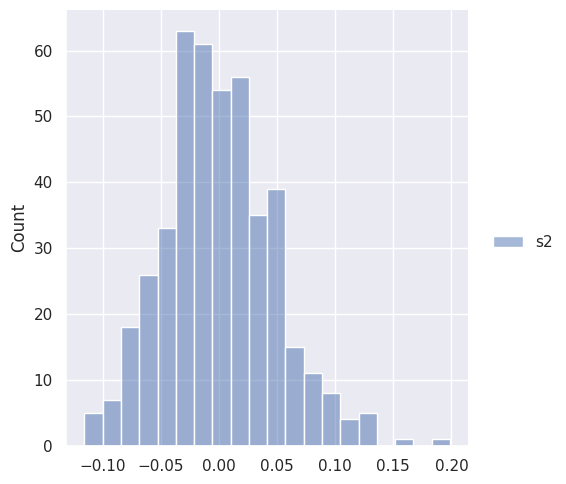

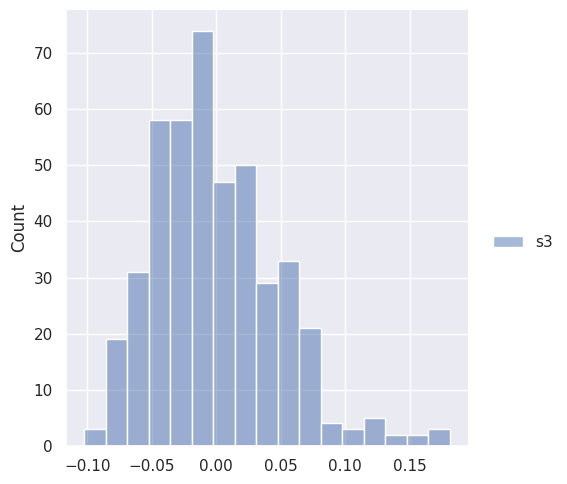

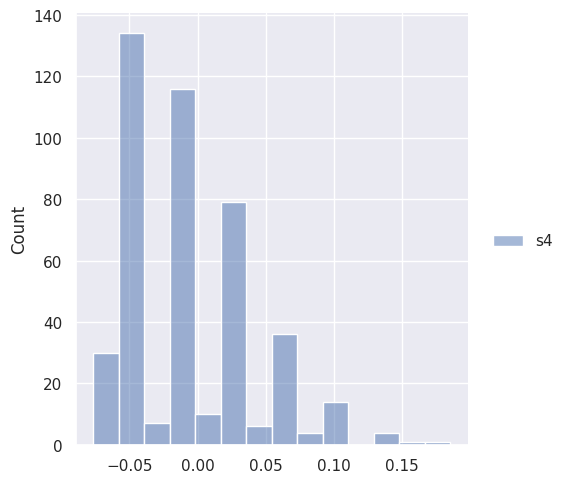

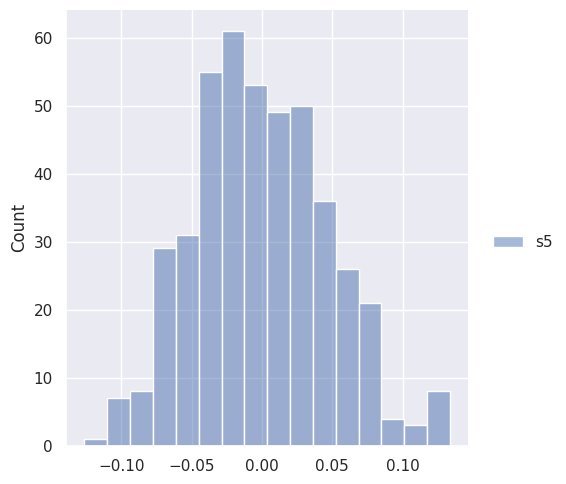

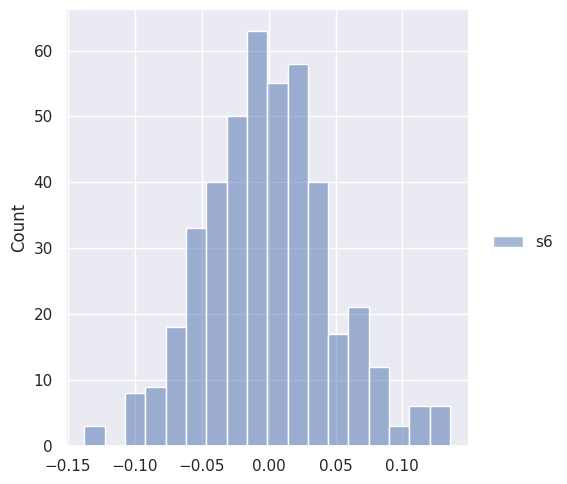

In [138]:
for col in df.items():
  sns.displot(col)
  plt.show()

In [139]:
g = df.items()

In [140]:
# 发现数据集的分布都是处于一种接近于标准正态分布的分布结构，好处：达达降低算法求解复杂度；数据量级被缩小到0附近，降低噪声对算法的影响，进而提升算法的准确度
#分析特征与目标的相关度， 有助于选择有效特征，剔除无效特征

df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

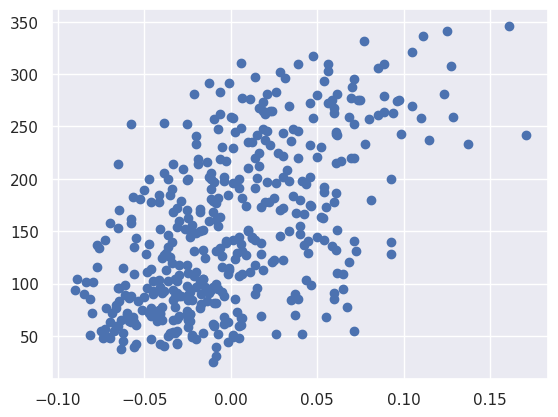

In [141]:
#研究bmi对血糖的影响
plt.scatter(df.bmi, y)

In [142]:
ln2 = LinearRegression()
ln2.fit(df[['bmi']], y)
df.bmi

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

In [143]:
type(df[['bmi']])

pandas.core.frame.DataFrame

In [144]:
df[['bmi']].shape

(442, 1)

In [145]:
type(df['bmi'])

pandas.core.series.Series

In [146]:
df['bmi'].shape

(442,)

In [149]:
xmin, xmax = df.bmi.min(), df.bmi.max()
test = np.linspace(xmin, xmax, 50).reshape(-1, 1)
y_ = ln2.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


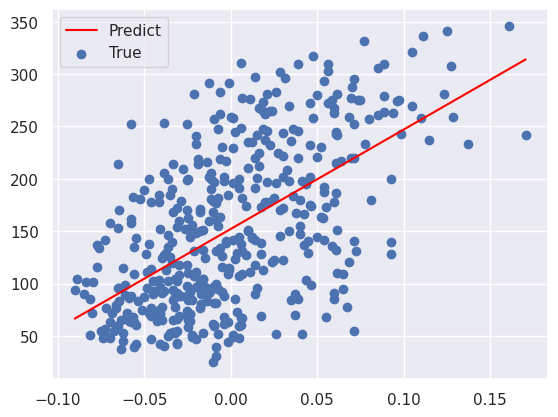

In [151]:
plt.plot(test, y_, label='Predict', color='red')
plt.scatter(df.bmi, y, label='True')
plt.legend()

In [153]:
# 可以表达他们之间大概的相关关系
ln2.coef_, ln2.intercept_

(array([949.43526038]), 152.13348416289617)

In [193]:
#对所有特征做相关分析

features_importance = {}
for col in df.columns:
  ln = LinearRegression()
  ln.fit(df[[col]], y)
  features_importance[col] = ln.coef_[0]

print(features_importance)

type(features_importance)

{'age': 304.18307452830607, 'sex': 69.71535567841462, 'bmi': 949.4352603840387, 'bp': 714.7382594960411, 's1': 343.25445188896657, 's2': 281.78459335245714, 's3': -639.145279322535, 's4': 696.8830300922251, 's5': 916.1373745509138, 's6': 619.2228206843714}


dict

In [205]:
df_importance = pd.DataFrame(features_importance，index=columns)  #再使用dict创建dataframe时
df_importance

SyntaxError: ignored

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


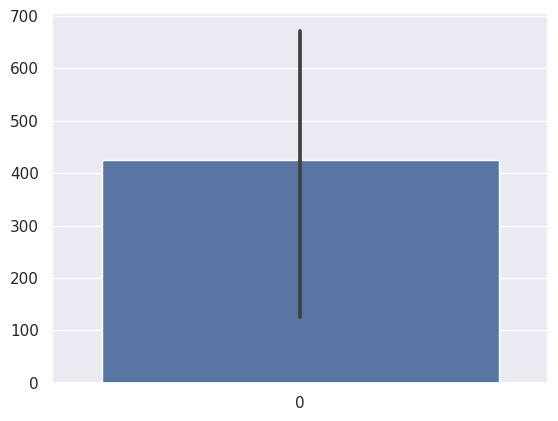

In [199]:
fig = sns.barplot(df_importance)
print(df_importance.index)
# fig.set(xticklabels=df_importance.index)


<Axes: >

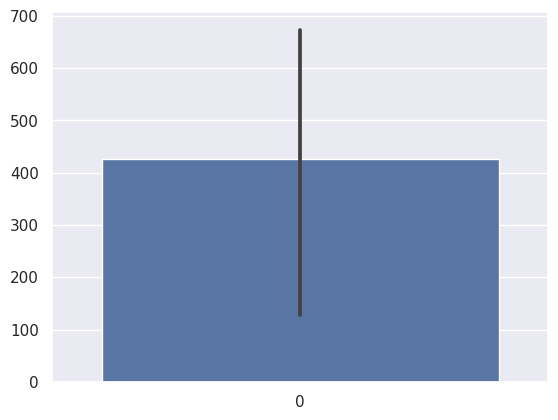

In [196]:
sns.barplot(df_importance.sort_values(ascending=False))

<Axes: >

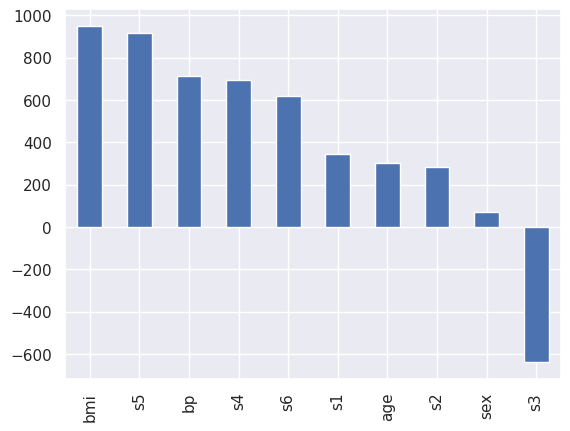

In [198]:
pd.Series(df_importance).sort_values(ascending=False).plot(kind='bar')

In [208]:
#因为sex对目标影响较小，所以先把sex删除
train = df.drop("sex", axis=1)
train

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [209]:
train.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   bmi     442 non-null    float64
 2   bp      442 non-null    float64
 3   s1      442 non-null    float64
 4   s2      442 non-null    float64
 5   s3      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


In [218]:
ln3 = LinearRegression()
knn2 = KNeighborsRegressor(n_neighbors=19)

In [219]:
from sklearn.model_selection import cross_val_predict
result = cross_val_predict(ln3, train, y, cv=10)


In [220]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, result)

3091.9085013578883

In [226]:
result1 = cross_val_predict(knn2, train, y, cv=10)
mean_squared_error(y, result1)

3340.1024116017597